In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection import ssd300_vgg16

# 데이터셋과 데이터 로더 준비
from torchvision.datasets import VOCDetection
from torch.utils.data import DataLoader

# 기타 필요한 라이브러리
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 미리 학습된 SSD 모델 로드
model = ssd300_vgg16(pretrained=True)

# 모델을 평가 모드로 설정
model.eval()

# 사용할 장치 설정(CPU 또는 GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [4]:
def get_transform():
    transforms = []
    # 이미지를 모델 입력 크기에 맞게 변환
    transforms.append(torchvision.transforms.Resize((300, 300)))
    transforms.append(torchvision.transforms.ToTensor())
    return torchvision.transforms.Compose(transforms)

# VOCDetection 데이터셋 불러오기
dataset = VOCDetection(root="./data/VOC2012", year="2012", image_set="val", download=True, transform=get_transform())

# 데이터 로더 준비
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

100.0%


Extracting ./data/VOC2012\VOCtrainval_11-May-2012.tar to ./data/VOC2012


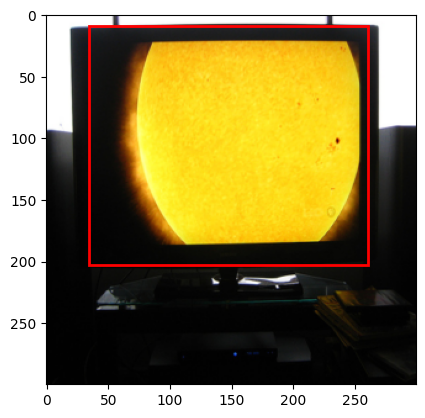

In [6]:
def visualize_prediction(image, target, threshold=0.5):
    image = image.cpu().data
    image = transforms.functional.to_pil_image(image)
    plt.imshow(image)
    for box, label, score in zip(target["boxes"], target["labels"], target["scores"]):
        if score > threshold:
            plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='red', linewidth=2))
    plt.show()

# 하나의 이미지에 대해 예측 수행
image, _ = dataset[0]
image = image.unsqueeze(0).to(device)

with torch.no_grad():
    prediction = model(image)

# 결과 시각화
visualize_prediction(image.squeeze(0), prediction[0])